## 2. Exploratory Data Analysis

To-dos:

* Create daily pricing calendar filling in values with last known price
* Categorise FuelCode into Petrol/Diesel/Other and Regular/Premium
* Geocode addresses for potential geospatial analysis

In [1]:
import pandas as pd

data = pd.read_csv('../data/price_history.csv.gz', compression='gzip')

In [2]:
# Convert to proper date field and extract date
data['PriceUpdatedDate'] = pd.to_datetime(data['PriceUpdatedDate'])
data['PriceUpdatedDate_date'] = data['PriceUpdatedDate'].dt.date

# Assuming any prices over $2.50/L is an error
data.drop(data[data['Price']>=250].index, inplace=True)

data.head()

,ServiceStationName,Address,Suburb,Postcode,Brand,FuelCode,PriceUpdatedDate,Price,PriceUpdatedDate_date
0,Metro Petroleum Islington,"144 Maitland Rd, ISLINGTON NSW 2296",ISLINGTON,2296.0,Metro Fuel,E10,2017-10-01 00:02:52,116.9,2017-10-01
1,Independent Punchbowl,"10-12 Park Ave, Punchbowl NSW 2196",Punchbowl,2196.0,Independent,E10,2017-10-01 00:08:44,119.9,2017-10-01
2,Independent Punchbowl,"10-12 Park Ave, Punchbowl NSW 2196",Punchbowl,2196.0,Independent,P98,2017-10-01 00:08:44,139.9,2017-10-01
3,Independent Punchbowl,"10-12 Park Ave, Punchbowl NSW 2196",Punchbowl,2196.0,Independent,U91,2017-10-01 00:08:44,122.9,2017-10-01
4,Metro Minto,"1 Brookfield Road, Minto NSW 2566",Minto,2566.0,Metro Fuel,E10,2017-10-01 00:13:51,133.9,2017-10-01


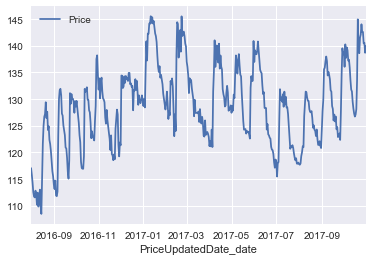

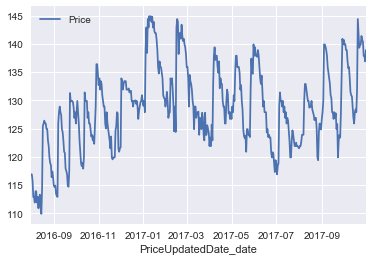

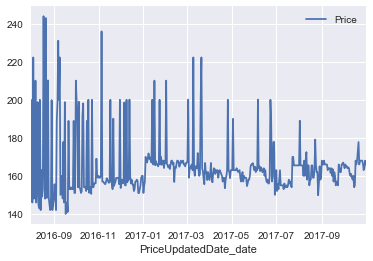

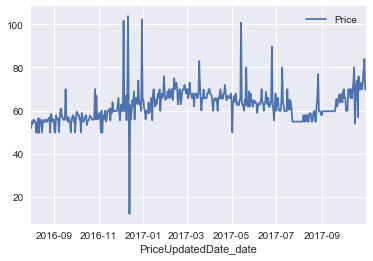

In [3]:
import seaborn as sns

% matplotlib inline

data[['Price','PriceUpdatedDate_date']].groupby(['PriceUpdatedDate_date']).mean().plot();
data[['Price','PriceUpdatedDate_date']].groupby(['PriceUpdatedDate_date']).median().plot();
data[['Price','PriceUpdatedDate_date']].groupby(['PriceUpdatedDate_date']).max().plot();
data[['Price','PriceUpdatedDate_date']].groupby(['PriceUpdatedDate_date']).min().plot();